In [1]:
import ROOT
from run_kinfit import build_custom_hypo
from draw_funcs import draw_chi2_gaussian_sim
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/00


In [2]:
entry = 2
nevents = 40000
mfield = 1.3
input_path = '/var/kinfit/data/tr_ph_run053786.root'
output_path = 'kinfit_etapipi_etato2gamma_2pi2pi0_bkg_run053786.root'


In [3]:
%%bash
    rm -f *.root

In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [5]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [6]:
build_custom_hypo('Hypo2ChPions4Photons.cpp')

Output(layout=Layout(border='1px solid black'))

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_etapipi_eta_to_2gamma_bkg_2pi2pi0/Hypo2ChPions4Photons_cpp.so
Warning in cling::IncrementalParser::CheckABICompatibility():
  Possible C++ standard library mismatch, compiled with __GLIBCXX__ '20210728'
  Extraction of runtime standard library version was: '20220506'


In [7]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_etapipi_eta_to_2gamma_bkg_2pi2pi0/TrPh_C.so
Warning in cling::IncrementalParser::CheckABICompatibility():
  Possible C++ standard library mismatch, compiled with __GLIBCXX__ '20210728'
  Extraction of runtime standard library version was: '20220506'


In [8]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

140002700238888

(TFile &) Name: /var/kinfit/data/tr_ph_run053786.root Title: 


In [9]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

140000364597248

(TrPh &) @0x7f5460001000


In [10]:
ROOT.gInterpreter.ProcessLine('a.setNEvents({})'.format(nevents))

0

In [11]:
ROOT.gInterpreter.ProcessLine('a.setEntry({})'.format(entry))

0

In [12]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

In [13]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [14]:
fl = TFile.Open(output_path, 'read')

In [15]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                        return p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [16]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 30, 2)')

140002700239752

(TF1 &) Name: f0 Title: f0


In [17]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+3)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 10)')

0

0

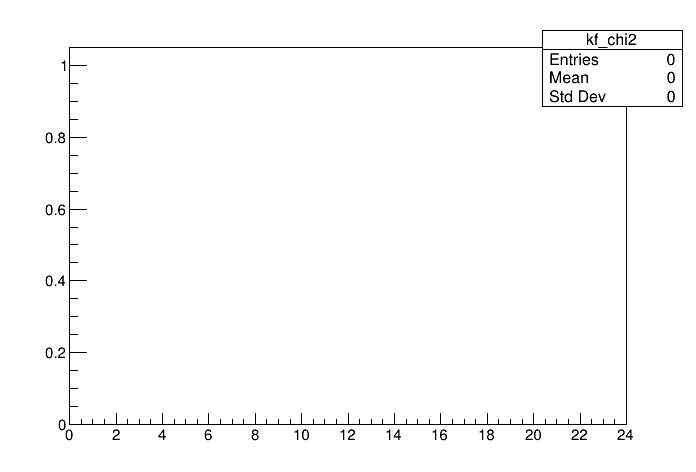

In [22]:
# ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')
ROOT.gInterpreter.ProcessLine('kf_chi2->Draw()')
ROOT.gInterpreter.ProcessLine('c1->Draw()')

ReferenceError: attempt to access a null-pointer

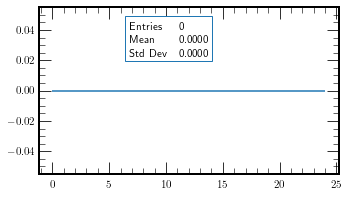

In [20]:
# draw_chi2_gaussian_sim("kf_chi2", "f0", xlabel=r'$\chi^2$')

In [ ]:
fl.Close()